In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
rent_data = "Resources/City_MedianRentalPrice_AllHomes-TT.csv"
sales_data = "Resources/Sale_Prices_Msa-TT.csv"

# Read the City and Ride Data
rent_data_df= pd.read_csv(rent_data)
sales_data_df= pd.read_csv(sales_data)



In [3]:
#filter only by the chosen location
regions = ['New York', 'Los Angeles','Chicago','Dallas',
           'Philadelphia', 'Miami','Atlanta', 'Cleveland',
           'Seattle', 'Phoenix']


#filter out period from 01-2010 to 09-2016 due to blanks
rent_data_df_cleaned=rent_data_df.drop(['2019-02','State','Metro','CountyName', 'SizeRank','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12'
                  ,'2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12'
                  ,'2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12'
                  ,'2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12'
                  ,'2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12'
                  ,'2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'
                  ,'2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09'], axis=1)



In [4]:
#pull in cities
population_df = rent_data_df_cleaned.loc[rent_data_df_cleaned['RegionName'].isin(regions)]
population_df['RegionName'].unique()

array(['Los Angeles', 'Atlanta', 'Chicago', 'New York', 'Cleveland',
       'Philadelphia', 'Phoenix', 'Dallas', 'Seattle', 'Miami'],
      dtype=object)

In [5]:
#remove dup cities
popcleanrent_df=population_df.drop_duplicates(['RegionName'], keep='first')
popcleanrent_df

,RegionName,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
0,Los Angeles,3197.0,3500.0,3250.0,3300.0,3400.0,3500.0,3500.0,3550.0,3526.0,...,3500.0,3500.0,3575.0,3500.0,3600.0,3600.0,3600.0,3600.0,3575.0,3500.0
1,Atlanta,1495.0,1435.0,1495.0,1450.0,1500.0,1550.0,1600.0,1637.5,1600.0,...,1750.0,1723.5,1800.0,1800.0,1800.0,1750.0,1700.0,1750.0,1750.0,1795.0
2,Chicago,1714.5,1700.0,1695.0,1700.0,1700.0,1749.0,1750.0,1795.0,1800.0,...,1760.0,1800.0,1850.0,1840.0,1850.0,1800.0,1795.0,1750.0,1750.0,1745.0
3,New York,2950.0,2900.0,2885.0,2900.0,2995.0,2995.0,3000.0,3000.0,3000.0,...,2863.5,2900.0,2900.0,2900.0,2900.0,2900.0,2850.0,2805.0,2800.0,2800.0
4,Cleveland,825.0,845.0,850.0,800.0,850.0,850.0,850.0,850.0,850.0,...,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0
5,Philadelphia,1300.0,1395.0,1300.0,1350.0,1385.0,1500.0,1549.5,1550.0,1550.0,...,1500.0,1550.0,1500.0,1500.0,1475.0,1400.0,1400.0,1450.0,1400.0,1400.0
6,Phoenix,1200.0,1200.0,1195.0,1222.5,1250.0,1295.0,1300.0,1325.0,1325.0,...,1350.0,1395.0,1395.0,1400.0,1400.0,1399.0,1395.0,1395.0,1400.0,1400.0
7,Dallas,1450.0,1495.0,1450.0,1500.0,1550.0,1600.0,1600.0,1650.0,1695.0,...,1650.0,1650.0,1650.0,1675.0,1640.0,1600.0,1600.0,1645.0,1618.0,1650.0
8,Seattle,2495.0,2400.0,2375.0,2495.0,2450.0,2500.0,2600.0,2600.0,2625.0,...,2662.5,2695.0,2700.0,2700.0,2700.0,2600.0,2595.0,2500.0,2500.0,2600.0
9,Miami,2300.0,2350.0,2250.0,2299.0,2300.0,2300.0,2300.0,2300.0,2300.0,...,2400.0,2450.0,2475.0,2500.0,2500.0,2500.0,2495.0,2450.0,2400.0,2400.0


In [6]:
#define target cities
regions = ['New York', 'Los Angeles','Chicago','Dallas',
           'Philadelphia', 'Miami','Atlanta', 'Cleveland',
           'Seattle', 'Phoenix']

#set index to target cities
df1 = popcleanrent_df.set_index('RegionName')






In [7]:
#create dictionary to store target city data
city_dict= {}

#store target city data
for region in regions:
    city_dict[region] = df1.loc[region]

#convert to dataframe
df_city = pd.DataFrame(city_dict)

#display created dataframe
df_city

,New York,Los Angeles,Chicago,Dallas,Philadelphia,Miami,Atlanta,Cleveland,Seattle,Phoenix
2016-10,2950.0,3197.0,1714.5,1450.0,1300.0,2300.0,1495.0,825.0,2495.0,1200.0
2016-11,2900.0,3500.0,1700.0,1495.0,1395.0,2350.0,1435.0,845.0,2400.0,1200.0
2016-12,2885.0,3250.0,1695.0,1450.0,1300.0,2250.0,1495.0,850.0,2375.0,1195.0
2017-01,2900.0,3300.0,1700.0,1500.0,1350.0,2299.0,1450.0,800.0,2495.0,1222.5
2017-02,2995.0,3400.0,1700.0,1550.0,1385.0,2300.0,1500.0,850.0,2450.0,1250.0
2017-03,2995.0,3500.0,1749.0,1600.0,1500.0,2300.0,1550.0,850.0,2500.0,1295.0
2017-04,3000.0,3500.0,1750.0,1600.0,1549.5,2300.0,1600.0,850.0,2600.0,1300.0
2017-05,3000.0,3550.0,1795.0,1650.0,1550.0,2300.0,1637.5,850.0,2600.0,1325.0
2017-06,3000.0,3526.0,1800.0,1695.0,1550.0,2300.0,1600.0,850.0,2625.0,1325.0
2017-07,3000.0,3500.0,1850.0,1650.0,1500.0,2300.0,1650.0,850.0,2675.0,1325.0


In [8]:

#define tick values for graph
values = list(df1.columns)
major_ticks = [value for value in values]

#define x-axis values
x_max = len(df_city)
x_min = 0




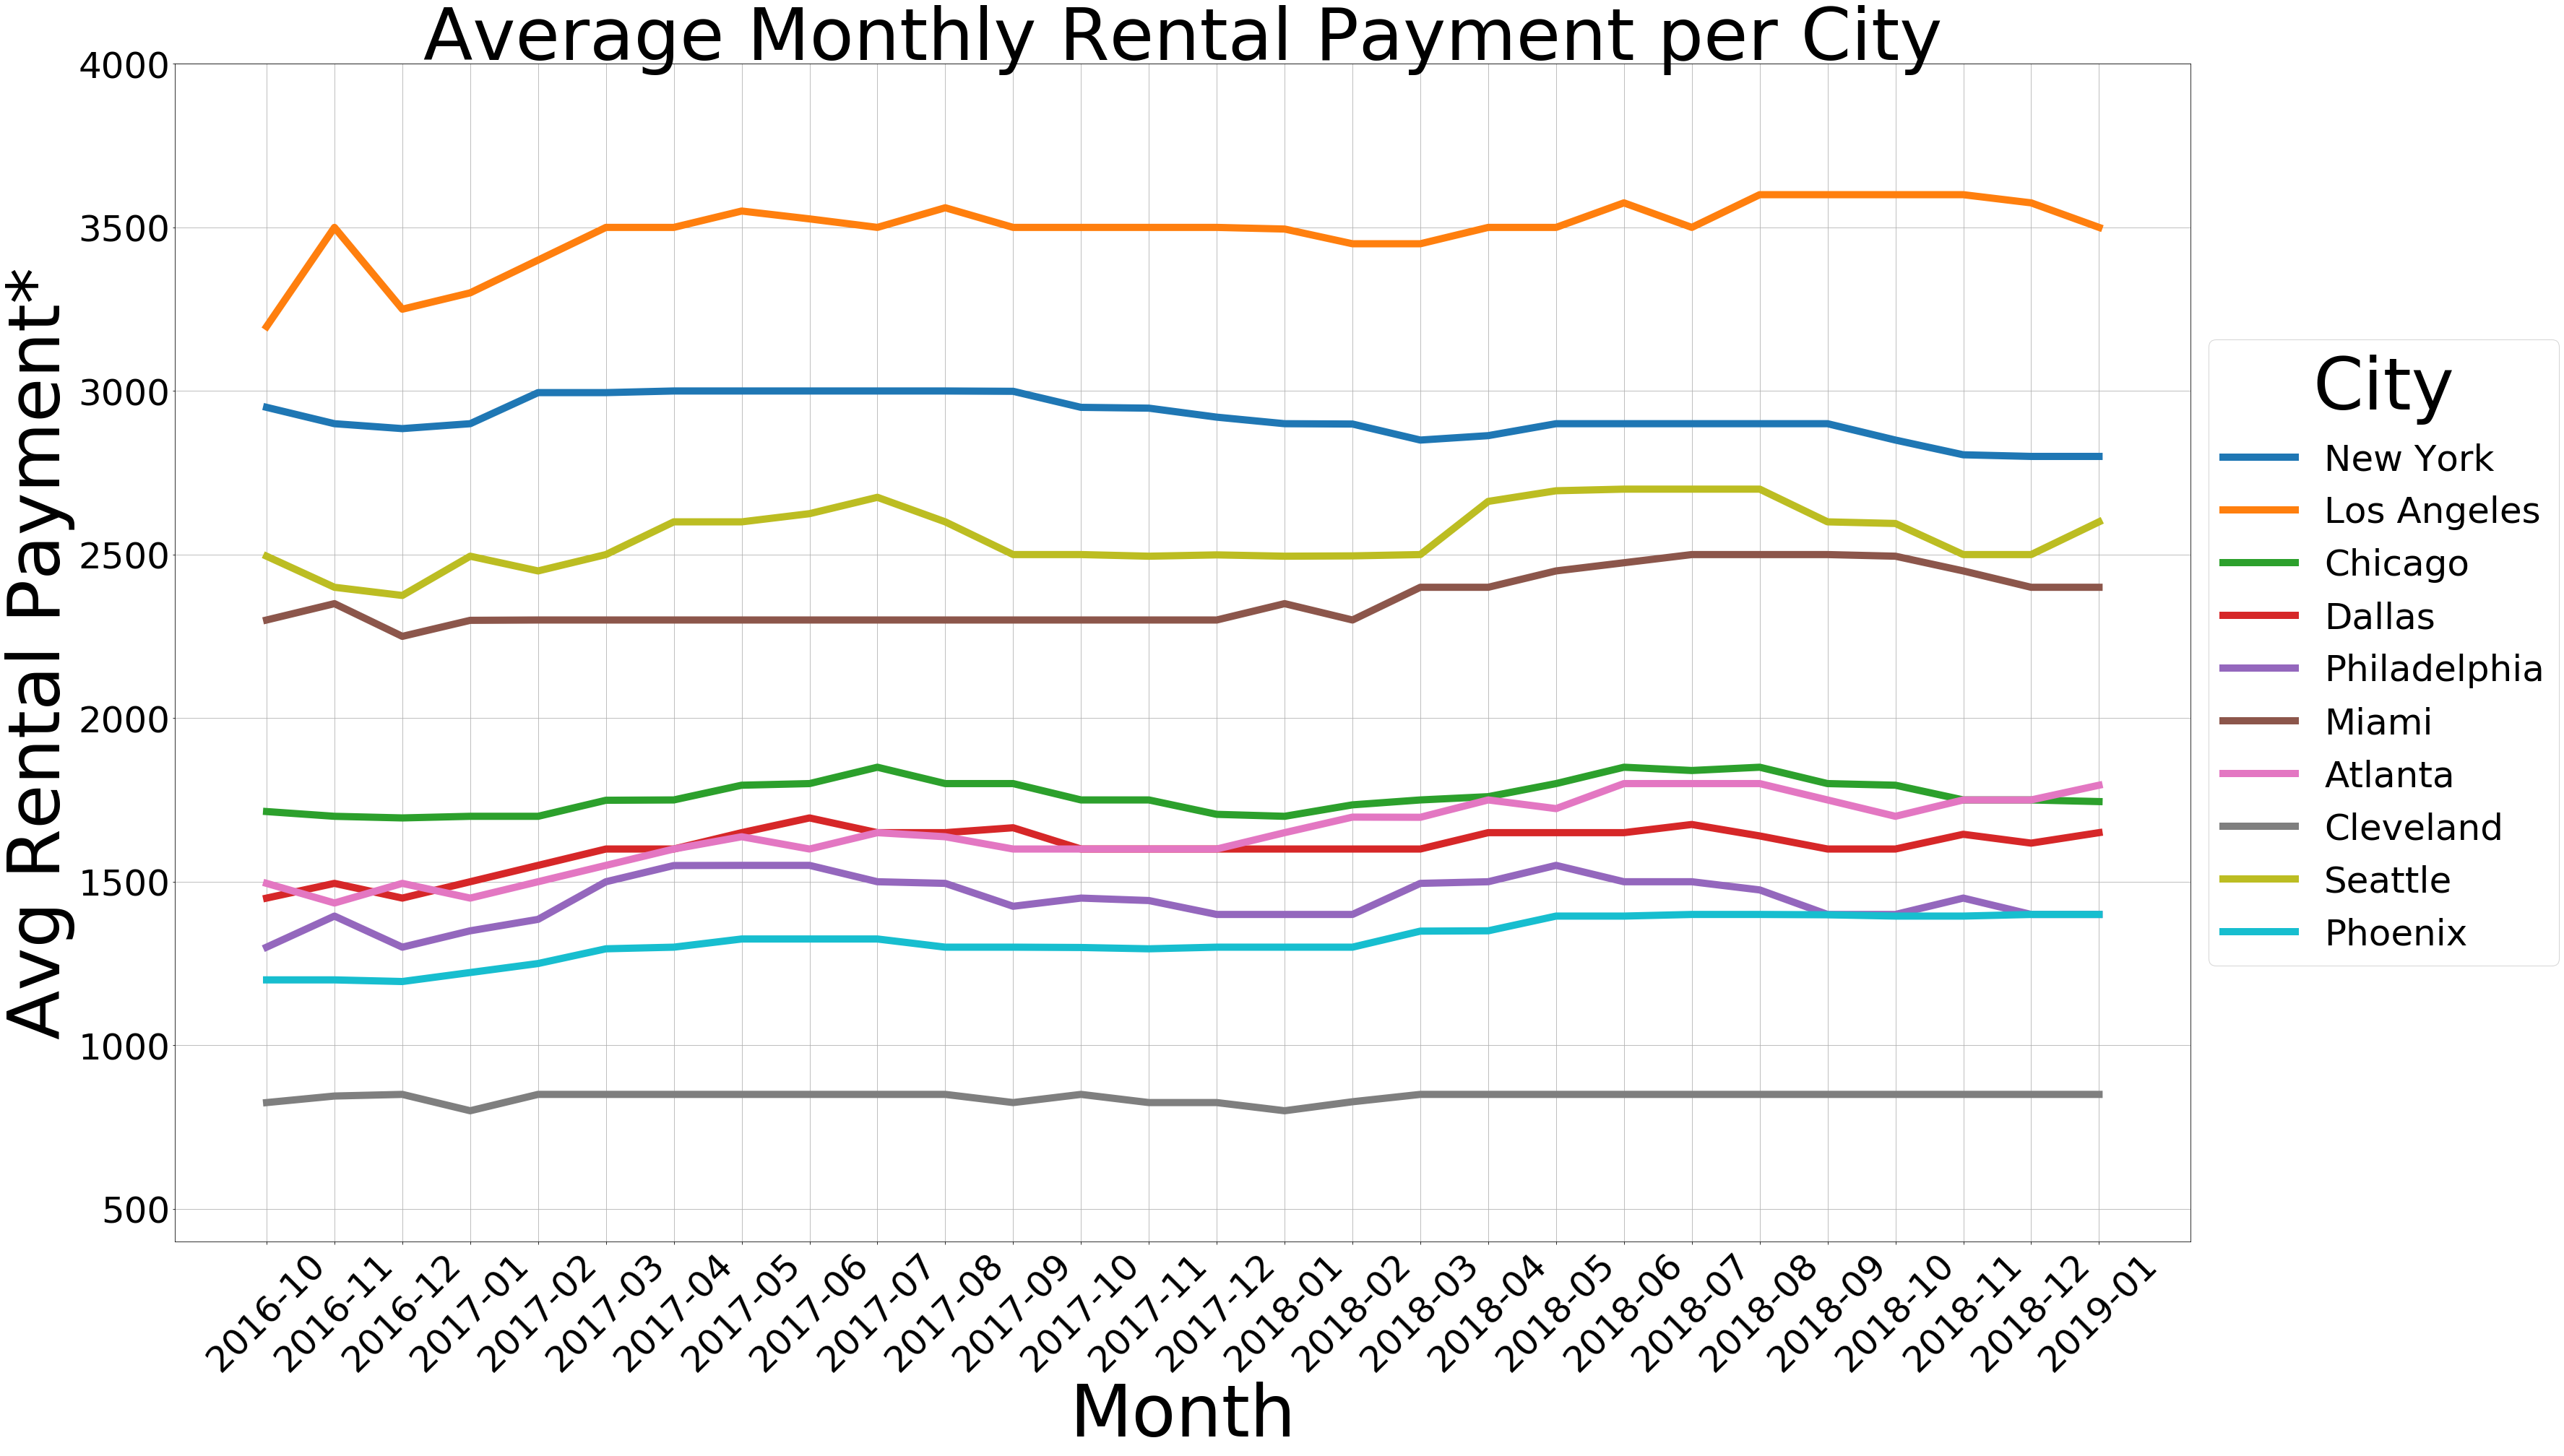

In [9]:
#define graph parameters
figsize=(50,30)
fontsize=100
linewidth=10

#initialize figure
fig, ax = plt.subplots(figsize=figsize)

#plot all cities on graph
for i in df_city:
    ax.plot(df_city[i], lw=linewidth)
#    ax.set_xticks(major_ticks, minor=False)
    
#graph formatting
plt.title('Average Monthly Rental Payment per City', fontsize=fontsize)
plt.ylabel('Avg Rental Payment*', fontsize=fontsize)
plt.xlabel('Month', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.xticks(rotation=45)
plt.grid(which='major')
plt.ylim(400,4000)

 #legend formatting
leg = plt.legend(loc='center left', bbox_to_anchor=(1, .5), title='Cities', ncol=1, fontsize=50)
leg.set_title('City',prop={'size':fontsize})

#save graph and show
plt.savefig(f'fig/AvgRentalPmtPerCity.png', bbox_inches='tight')
plt.show()